<a href="https://colab.research.google.com/github/SirSeriki/911-Calls-Project/blob/master/Gem%20Stone%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 

import seaborn as sns 

from google.colab import files
upload = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving fake_reg.csv to fake_reg.csv


In [0]:
df = pd.read_csv('fake_reg.csv')

In [0]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


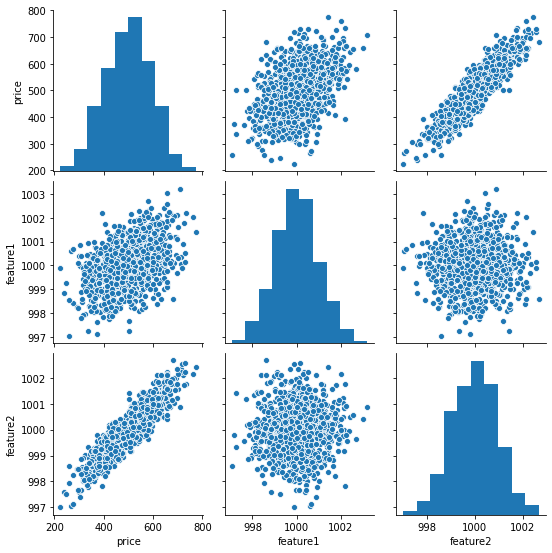

In [0]:
sns.pairplot(df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df[['feature1','feature2']].values

In [0]:
y = df['price'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [0]:
X_train.shape

(700, 2)

In [0]:
X_test.shape

(300, 2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
X_train

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
#help(Sequential)

In [0]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

model.fit(x=X_train,y=y_train,epochs=250)




Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256701.2969
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256577.3125
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256352.0000
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256136.9844
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255954.9531
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255605.4531
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255626.9375
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255295.7969
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255013.6562
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254878.4062
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254494.7031
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

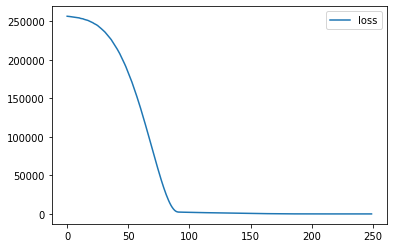

In [0]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


In [0]:
model.evaluate(X_test,y_test,verbose=0)

24.91103744506836

In [0]:
model.evaluate(X_train,y_train,verbose=0)

24.02006721496582

In [0]:
test_predictions = model.predict(X_test)
#test_predictions

In [0]:
test_predictions = pd.Series(test_predictions.reshape(300,))

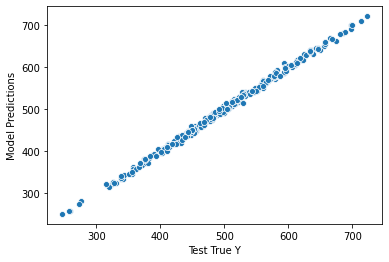

In [0]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y','Model Predictions']
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)


In [0]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error
 mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

3.9957574356398133

In [0]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

24.85928971116521

In [0]:
#Predicting the price of a new gem
new_gem = [[988,1000]]
new_gem = scaler.transform(new_gem)
model.predict(new_gem)

array([[38.220856]], dtype=float32)

In [0]:
#How to save the model
from tensorflow.keras.models import load_model
model.save('my_gem_model.h5')

In [0]:
later_model = load_model('my_gem_model.h5')

In [0]:
later_model.predict(new_gem)

array([[38.220856]], dtype=float32)